<a href="https://colab.research.google.com/github/devonreing/AI/blob/main/HW5/Genetic_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimum Design of an I-Beam
Author: Devon Reing

The goal of this project is to use multi-objective engineering design and the Genetic Algorithm to optimize a load bearing I-beam.

The general optimization goal for this I-beam problem is to minimize F=[f1,f2] where the cross section area (f1) and the static deflection (f2) of the I-beam are defined as:

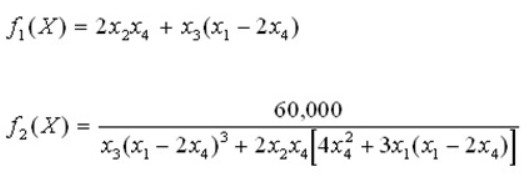

The problem exists because the optimization of f1 will lead to the worst possible solution for f2 and vice versa.

The geometric side constraints are:

* x1 can range from 10 to 80
* x2 can range from 10 to 50
* x3 can range from 0.9 to 5.0
* x4 can range from 0.9 to 5.0

# Section 1
This section of code installs the necessary R libraries to perform this optimization. These libraries include the Genetic Algorithms library, the statistical graphics library, and the standard plotting library.

In [ ]:
# genetic algorithms
install.packages('GA')

# statistical graphics
install.packages('ggplot2')

# used to create plots and charts, including line charts
# scatter plots, bar charts , histograms, etc.
install.packages('plotly')

# Loading the needed libraries
library(GA)
library(plotly)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘foreach’, ‘iterators’, ‘Rcpp’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’


Loading required package: foreach

Loading required package: iterators

Package 'GA' version 3.2.4
Type 'citation("GA")' for citing this R package in publications.


Attaching package: ‘GA’


The following object is masked from ‘package:utils’:

    de


Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




# Function 1

Now that the necessary libraries are installed and loaded onto the R workspace, the next step of the optimization problem is finding the values of x1, x2, x3, and x4 that optimize the function f1 provided in the header of this project. The optimization of this function will optimize the area that is included in the cross section area of the final I-beam used. The optimization of this problem will be achieved when the fitness value is minimized, which is achieved using a population size of 50, 100 generations, a crossover probability of 75%, and a mutation probability of 0.1%.

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -50.54893 
Solution = 
           x1       x2       x3       x4
[1,] 15.94912 12.26318 1.198338 1.420557

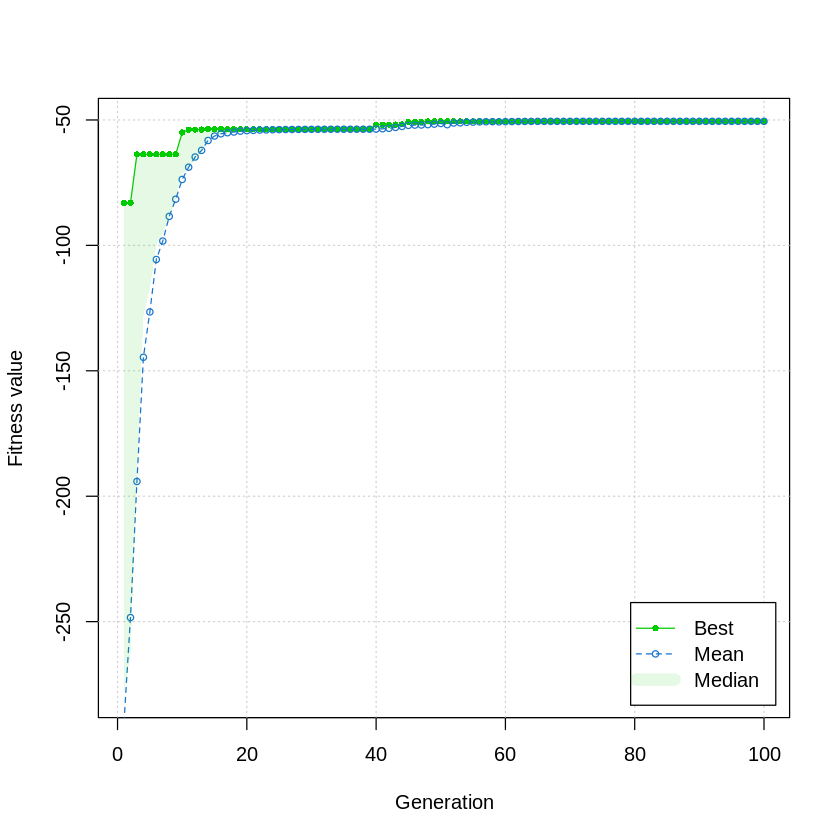

In [30]:
# f1 function that determines the cross section area of the I-beam
func1 <- function(x1, x2, x3, x4)
{
    (2 * x2 * x4) + (x3 * (x1 - (2 * x4)))
}

# Parameters constraints
x1 <- seq(10, 80, by = 0.5)
x2 <- seq(10, 50, by = 0.5)
x3 <- seq(0.9, 5.0, by = 0.1)
x4 <- seq(0.9, 5.0, by = 0.1)

# Multiple func1 by -1 to minimize the function
# set crossover and mutation value
GA1 <- ga(type = "real-valued",
         fitness =  function(x) -func1(x[1], x[2], x[3], x[4]),
         lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
         popSize = 50, maxiter = 100, run = 100, pcrossover = .75, pmutation = .001)

summary(GA1)
plot(GA1)

The minimization of this function results in the values obtained for x1, x2, x3 and x4 to be towards the lower bounds of their alloted values. While none of them hit the exact values of the lower bounds set in the parameter constraints, all of them tending towards those values is in line with what would be expected when trying to minimize just the f1 function. The solution was found in 100 iterations of the genetic algorithm and results in a fitness value of -50.54893. The x values that produce this result are:

*   x1 = 15.94912
*   x2 = 12.26318
*   x3 = 1.198338
*   x4 = 1.420557

Each iteration, or generation, is graphed using its best, median, and mean fitness value. The best value is plotted using the solid green line with a solid green dot on each generation's best value. The average value is plotted using the dotted blue line with a hollow blue dot on each generation's mean value. The area in between these two lines are shaded with a light green, which shows the median values for each generation.



# Function 2

The next step of the optimization problem is finding the values of x1, x2, x3, and x4 that optimize the function f2 provided in the header of this project. The optimization of this function will optimize the static deflection of the final I-beam used. The optimization of this problem will be achieved when the fitness value is minimized, which is achieved using a population size of 50, 100 generations, a crossover probability of 75%, and a mutation probability of 0.1%.

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -0.01078213 
Solution = 
           x1       x2       x3       x4
[1,] 73.55555 40.27696 3.775527 3.809153

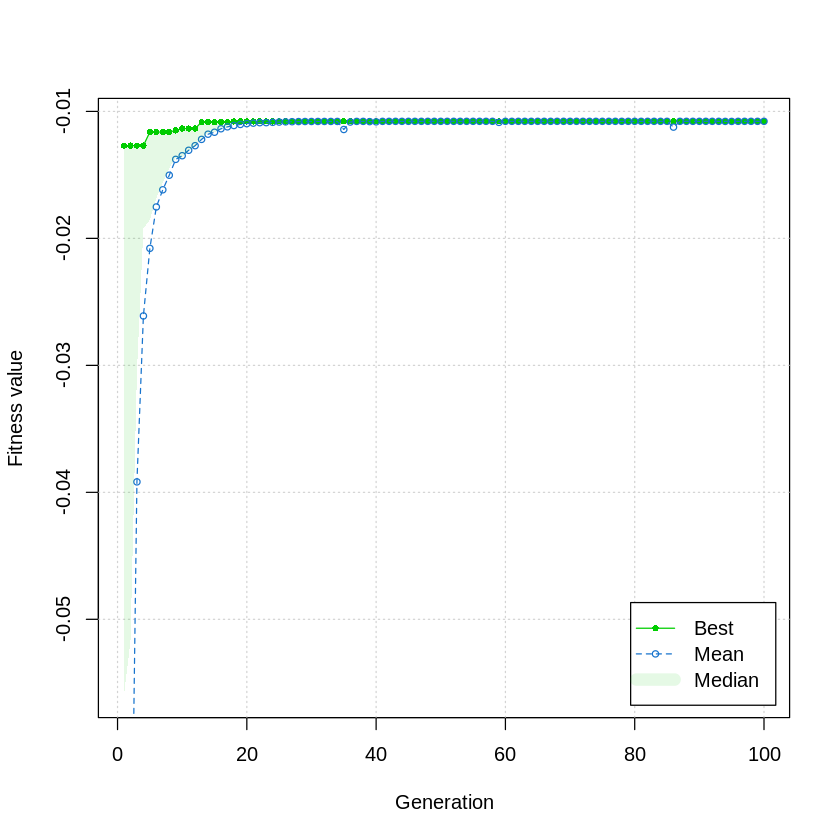

In [20]:
# f2 function that will minimize the static deflection value
func2 <- function(x1, x2, x3, x4)
{
    60000 / ((x3 * (x1 - 2 * x4)^3) + 2 * x2 * x4 * (4 * x4^2 + 3 * x1 * (x1 - 2 * x4)))
}

# Parameters constraints
x1 <- seq(10, 80, by = 0.5)
x2 <- seq(10, 50, by = 0.5)
x3 <- seq(0.9, 5.0, by = 0.1)
x4 <- seq(0.9, 5.0, by = 0.1)
a <- seq(0, 1, by = 0.01)

# Multiple func2 by -1 to minimize the function
# set crossover and mutation value
GA2 <- ga(type = "real-valued",
         fitness =  function(x) -func2(x[1], x[2], x[3], x[4]),
         lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
         popSize = 50, maxiter = 100, run = 100, pcrossover = .75, pmutation = .001)

summary(GA2)
plot(GA2)

The minimization of this function results in the values obtained for x1, x2, x3 and x4 to be towards the upper bounds of their alloted values. While none of them hit the exact values of the upper bounds set in the parameter constraints, all of them tending towards those values is in line with what would be expected when trying to minimize just the f2 function. The solution was found in 100 iterations of the genetic algorithm and results in a fitness value of -0.01078213. The x values that produce this result are:

*   x1 = 73.55555
*   x2 = 40.27696
*   x3 = 3.775527
*   x4 = 3.809153

Each iteration, or generation, is graphed using its best, median, and mean fitness value. The best value is plotted using the solid green line with a solid green dot on each generation's best value. The average value is plotted using the dotted blue line with a hollow blue dot on each generation's mean value. The area in between these two lines are shaded with a light green, which shows the median values for each generation.


# Function 3
The next step of the optimization problem is finding the values of x1, x2, x3, and x4 that optimize the weighted function f3 that combines f1 and f2 into one function. The optimization of this function will not optimize the area that is included in the cross section area nor the static deflection of the final I-beam used, but will instead find the values that optimize the entire construction of the I-beam.

The weighted function uses variables a and b that are decimal values that add up to 1. These weights represent the percentage of weights or importance placed on f1 and f2. The a variable corresponds to f1 and the b variable corresponds to f2.

In this function and genetic algorithm, a is added as a constraint to optimize which allows the function to find the best percentage for each function that results in the optimized I-beam. The b value is determined by subtracting the a value from 1 to ensure these values always add to 1.

The optimization of this problem will be achieved when the fitness value of f3 is minimized, which is achieved using a population size of 50, 100 generations, a crossover probability of 75%, and a mutation probability of 0.1%.


── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4 x5
lower 10 10 0.9 0.9  0
upper 80 50 5.0 5.0  1

GA results: 
Iterations             = 100 
Fitness function value = -0.007858917 
Solution = 
           x1       x2       x3       x4        x5
[1,] 77.86993 49.18839 2.336818 4.286123 0.3713066

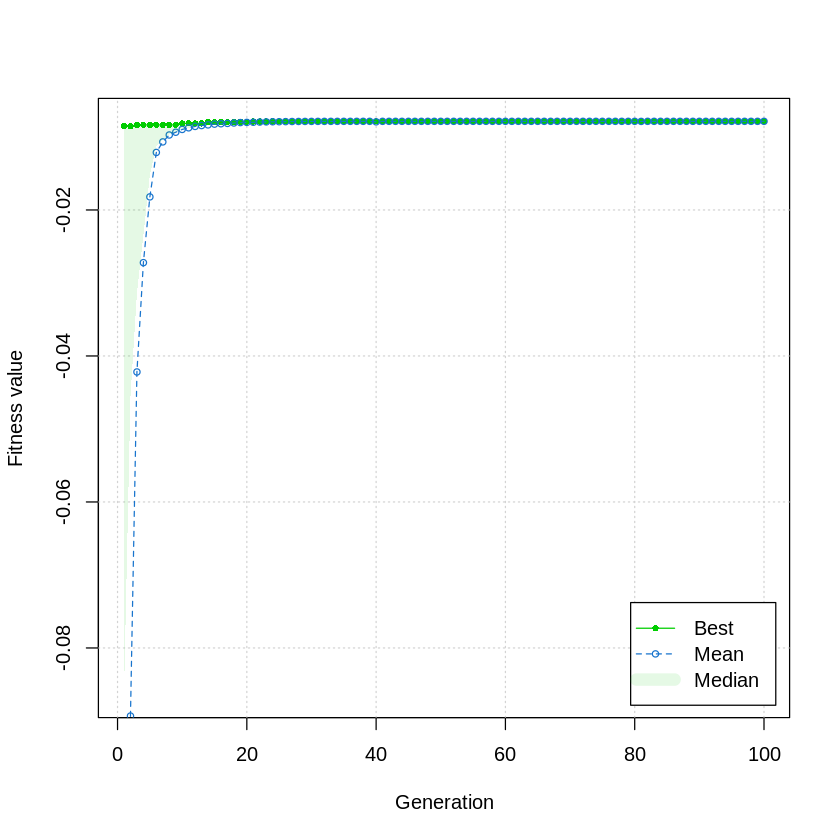

In [31]:
# f3 which combines f1 and f2 together into one function to be optimized
# include a as a parameter to be optimized to find the best weights possible to be used in the final construction of the beam
func3 <- function(x1, x2, x3, x4, a)
{
    (a * ((2 * x2 * x4) + (x3 * (x1 - (2 * x4))))) + ((1 - a) *(60000 / ((x3 * (x1 - 2 * x4)^3) + 2 * x2 * x4 * (4 * x4^2 + 3 * x1 * (x1 - 2 * x4)))))
}

# Parameters constraints
x1 <- seq(10, 80, by = 0.5)
x2 <- seq(10, 50, by = 0.5)
x3 <- seq(0.9, 5.0, by = 0.1)
x4 <- seq(0.9, 5.0, by = 0.1)
a <- seq(0, 1, by = 0.01)

# Multiple func3 by -1 to minimize the function
# set crossover and mutation value
GA3 <- ga(type = "real-valued",
         fitness =  function(x) -func3(x[1], x[2], x[3], x[4], a[1]),
         lower = c(10, 10, 0.9, 0.9, 0), upper = c(80, 50, 5.0, 5.0, 1),
         popSize = 50, maxiter = 100, run = 100, pcrossover = .75, pmutation = .001)

summary(GA3)
plot(GA3)

The minimization of this function results in the values obtained for x1, x2, and x4 to be towards the upper bounds of their alloted values, and x3 is towards the middle of its alloted value. The mix of these values in where they lie in relation to their alloted values is to be expected when trying to minimize the combined function. The solution was found in 100 iterations of the genetic algorithm and results in a fitness value of -0.007858917. The x values that produce this result are:

*   x1 = 77.86993
*   x2 = 49.18839
*   x3 = 2.336818
*   x4 = 4.286123

Additionally, this function takes a as a parameter to be optimized, meaning that the best weight value to be used for weighing the functions is found. Through the genetic algorithm, the best a value to use that was found during this trial was 0.3713066 meaning the best b value found during this trial was 0.6286934.

Each iteration, or generation, is graphed using its best, median, and mean fitness value. The best value is plotted using the solid green line with a solid green dot on each generation's best value. The average value is plotted using the dotted blue line with a hollow blue dot on each generation's mean value. The area in between these two lines are shaded with a light green, which shows the median values for each generation.


# Function 4
This function uses the same equation as function 3 to optimize the combination of f1 and f2 to find the best solution for the construction of the I-beam. Similar to before, x1, x2, x3, and x4 are used as constraints, but a and b are hard-coded values. This allows us to view how the behavior changes based on the different weights attributed to each function within f3.

The weighted function uses variables a and b that are decimal values that add up to 1. These weights represent the percentage of weights or importance placed on f1 and f2. The a variable corresponds to f1 and the b variable corresponds to f2. In this trial, a is set to 0, essentially wiping out the importance of f1, and b is set to 1, placing all of the value on f2.

The optimization of this problem will be achieved when the fitness value of f3 is minimized, which is achieved using a population size of 50, 100 generations, a crossover probability of 75%, and a mutation probability of 0.1%.


── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -0.009203116 
Solution = 
           x1       x2       x3       x4
[1,] 76.26085 40.79976 3.734952 4.207158

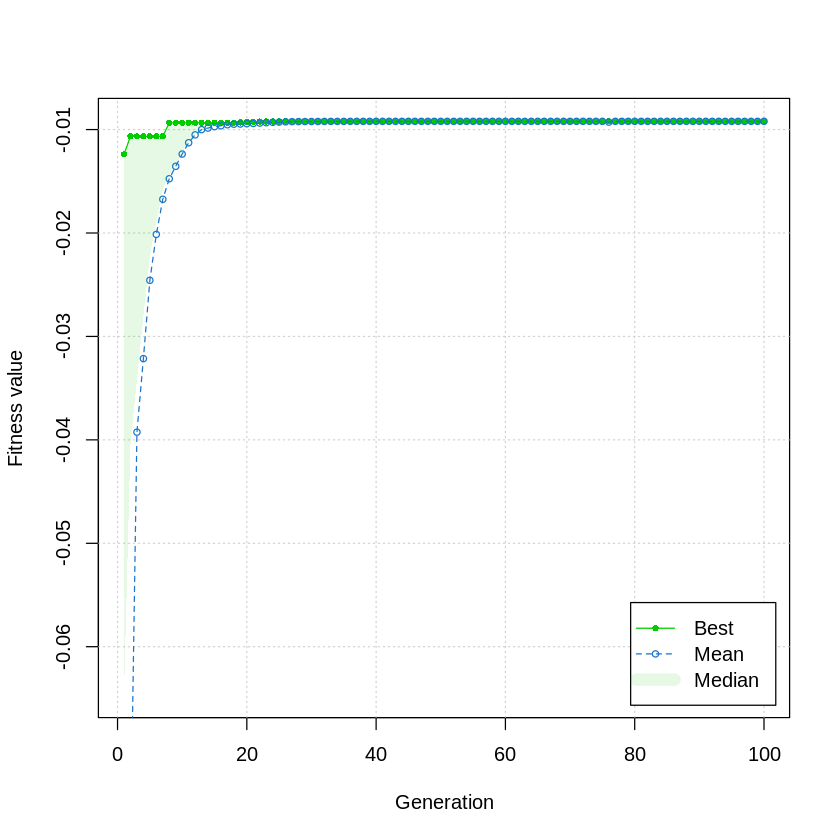

In [22]:
# function f4 combines f1 and f2 together
# set the a value to be 0 and the b value to be 1
func4 <- function(x1, x2, x3, x4)
{
    (0 * ((2 * x2 * x4) + (x3 * (x1 - (2 * x4))))) + ((1) *(60000 / ((x3 * (x1 - 2 * x4)^3) + 2 * x2 * x4 * (4 * x4^2 + 3 * x1 * (x1 - 2 * x4)))))
}

# Parameters constraints
x1 <- seq(10, 80, by = 0.5)
x2 <- seq(10, 50, by = 0.5)
x3 <- seq(0.9, 5.0, by = 0.1)
x4 <- seq(0.9, 5.0, by = 0.1)

# Multiple func4 by -1 to minimize the function
# set crossover and mutation value
GA4 <- ga(type = "real-valued",
         fitness =  function(x) -func4(x[1], x[2], x[3], x[4]),
         lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
         popSize = 50, maxiter = 100, run = 100, pcrossover = .75, pmutation = .001)

summary(GA4)
plot(GA4)

The minimization of this function results in the values obtained for x1, x2, and x4 to be towards the upper bounds of their alloted values, and x3 is towards the middle of its alloted value. The mix of these values in where they lie in relation to their alloted values is to be expected when trying to minimize the combined function, but I would have expected x3 to also be closer to the upper bound. This is because the a and b values that are hardcoded place all the value on f2, meaning I would have expected the results of each x value to mirror the results of function 2. The solution was found in 100 iterations of the genetic algorithm and results in a fitness value of -0.009203116. The x values that produce this result are:

*   x1 = 76.26085
*   x2 = 40.79976
*   x3 = 3.734952
*   x4 = 4.207158


Each iteration, or generation, is graphed using its best, median, and mean fitness value. The best value is plotted using the solid green line with a solid green dot on each generation's best value. The average value is plotted using the dotted blue line with a hollow blue dot on each generation's mean value. The area in between these two lines are shaded with a light green, which shows the median values for each generation.


# Function 5
This function uses the same equation as function 3 to optimize the combination of f1 and f2 to find the best solution for the construction of the I-beam. Similar to before, x1, x2, x3, and x4 are used as constraints, but a and b are hard-coded values. This allows us to view how the behavior changes based on the different weights attributed to each function within f3.

The weighted function uses variables a and b that are decimal values that add up to 1. These weights represent the percentage of weights or importance placed on f1 and f2. The a variable corresponds to f1 and the b variable corresponds to f2. In this trial, a is set to 1, placing all of the value on f1, and b is set to 0, essentially wiping out the importance of f2.

The optimization of this problem will be achieved when the fitness value of f3 is minimized, which is achieved using a population size of 50, 100 generations, a crossover probability of 75%, and a mutation probability of 0.1%.


── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -79.14086 
Solution = 
           x1       x2       x3       x4
[1,] 13.25044 13.75131 1.428469 2.443146

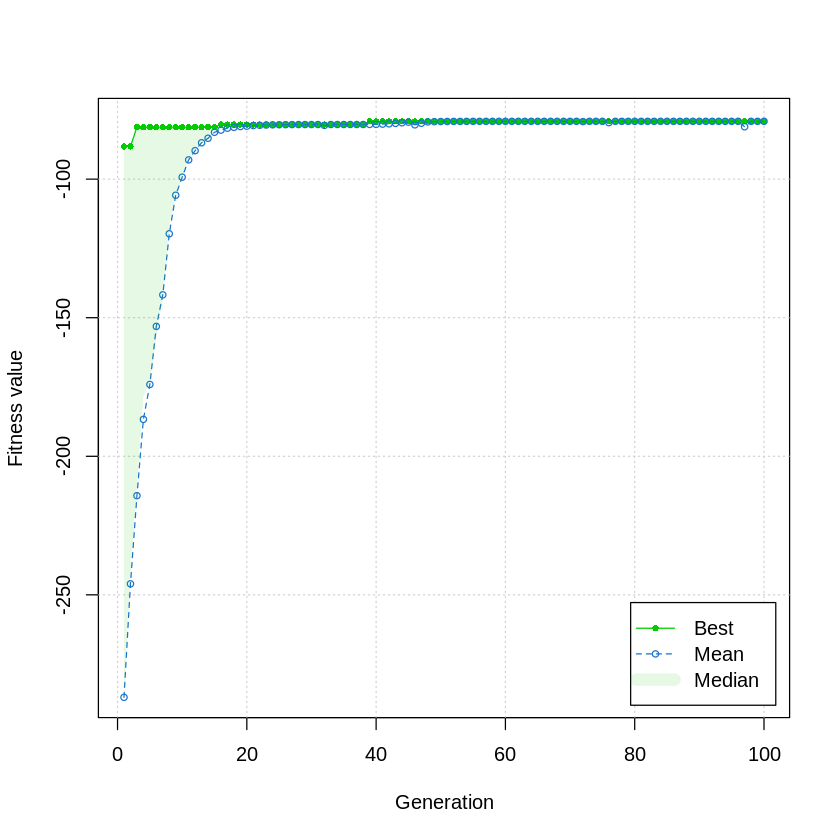

In [23]:
# function f5 combines f1 and f2 into one equation
# set the a value to be 1 and the b value to be 0
func5 <- function(x1, x2, x3, x4)
{
    (1 * ((2 * x2 * x4) + (x3 * (x1 - (2 * x4))))) + (0 *(60000 / ((x3 * (x1 - 2 * x4)^3) + 2 * x2 * x4 * (4 * x4^2 + 3 * x1 * (x1 - 2 * x4)))))
}

# Parameters constraints
x1 <- seq(10, 80, by = 0.5)
x2 <- seq(10, 50, by = 0.5)
x3 <- seq(0.9, 5.0, by = 0.1)
x4 <- seq(0.9, 5.0, by = 0.1)

# Multiple func5 by -1 to minimize the function
# set crossover and mutation value
GA5 <- ga(type = "real-valued",
         fitness =  function(x) -func5(x[1], x[2], x[3], x[4]),
         lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
         popSize = 50, maxiter = 100, run = 100, pcrossover = .75, pmutation = .001)

summary(GA5)
plot(GA5)

The minimization of this function results in the values obtained for x1, x2, x3 and x4 to be towards the lower bounds of their alloted values. All of these values tending towards their lower bound is in line with what I would have expected as the hardcoded a and b values place all of the value on f1. This means the results should be similar to when just f1 was being minimized. The solution was found in 100 iterations of the genetic algorithm and results in a fitness value of -79.14086. The x values that produce this result are:

*   x1 = 13.25044
*   x2 = 13.75131
*   x3 = 1.428469
*   x4 = 2.443146

Each iteration, or generation, is graphed using its best, median, and mean fitness value. The best value is plotted using the solid green line with a solid green dot on each generation's best value. The average value is plotted using the dotted blue line with a hollow blue dot on each generation's mean value. The area in between these two lines are shaded with a light green, which shows the median values for each generation.




# Function 6
This function uses the same equation as function 3 to optimize the combination of f1 and f2 to find the best solution for the construction of the I-beam. Similar to before, x1, x2, x3, and x4 are used as constraints, but a and b are hard-coded values. This allows us to view how the behavior changes based on the different weights attributed to each function within f3.

The weighted function uses variables a and b that are decimal values that add up to 1. These weights represent the percentage of weights or importance placed on f1 and f2. The a variable corresponds to f1 and the b variable corresponds to f2. In this trial, a is set to .75, placing most or 75% of the value on f1, and b is set to .25, placing little or 25% of the value on f2.

The optimization of this problem will be achieved when the fitness value of f3 is minimized, which is achieved using a population size of 50, 100 generations, a crossover probability of 75%, and a mutation probability of 0.1%.


── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -46.84594 
Solution = 
           x1       x2       x3        x4
[1,] 20.31998 14.51266 1.898466 0.9280148

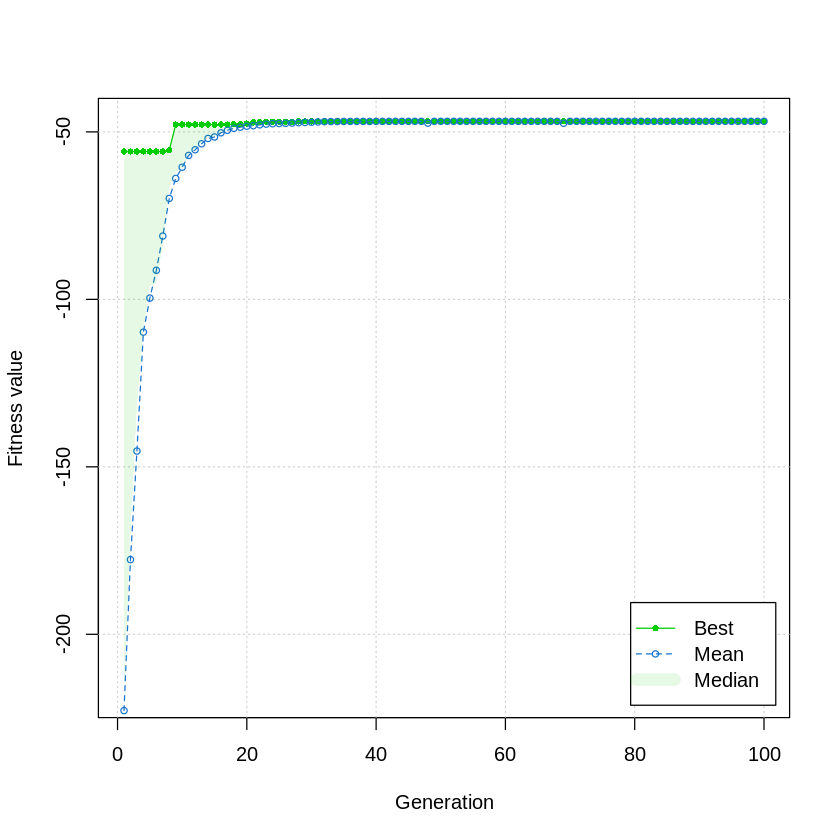

In [24]:
# function f6 combines f1 and f2 into one equation
# set the a value to be .75 and the b value to be .25
func6 <- function(x1, x2, x3, x4)
{
    (.75 * ((2 * x2 * x4) + (x3 * (x1 - (2 * x4))))) + (.25 *(60000 / ((x3 * (x1 - 2 * x4)^3) + 2 * x2 * x4 * (4 * x4^2 + 3 * x1 * (x1 - 2 * x4)))))
}

# Parameters constraints
x1 <- seq(10, 80, by = 0.5)
x2 <- seq(10, 50, by = 0.5)
x3 <- seq(0.9, 5.0, by = 0.1)
x4 <- seq(0.9, 5.0, by = 0.1)

# Multiple func6 by -1 to minimize the function
# set crossover and mutation value
GA6 <- ga(type = "real-valued",
         fitness =  function(x) -func6(x[1], x[2], x[3], x[4]),
         lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
         popSize = 50, maxiter = 100, run = 100, pcrossover = .75, pmutation = .001)

summary(GA6)
plot(GA6)

The minimization of this function results in the values obtained for x1, x2, x3 and x4 to be towards the lower bounds of their alloted values. All of these values tending towards their lower bound is in line with what I would have expected as the hardcoded a and b values place most of the value on f1. This means the results should be similar to when just f1 was being minimized. The solution was found in 100 iterations of the genetic algorithm and results in a fitness value of -46.84594. The x values that produce this result are:

*   x1 = 20.31998
*   x2 = 14.51266
*   x3 = 1.898466
*   x4 = 0.9280148

Each iteration, or generation, is graphed using its best, median, and mean fitness value. The best value is plotted using the solid green line with a solid green dot on each generation's best value. The average value is plotted using the dotted blue line with a hollow blue dot on each generation's mean value. The area in between these two lines are shaded with a light green, which shows the median values for each generation.


# Function 6
This function uses the same equation as function 3 to optimize the combination of f1 and f2 to find the best solution for the construction of the I-beam. Similar to before, x1, x2, x3, and x4 are used as constraints, but a and b are hard-coded values. This allows us to view how the behavior changes based on the different weights attributed to each function within f3.

The weighted function uses variables a and b that are decimal values that add up to 1. These weights represent the percentage of weights or importance placed on f1 and f2. The a variable corresponds to f1 and the b variable corresponds to f2. In this trial, a is set to .5, placing 50% of the value on f1, and b is set to .5, placing 50% of the value on f2.

The optimization of this problem will be achieved when the fitness value of f3 is minimized, which is achieved using a population size of 50, 100 generations, a crossover probability of 75%, and a mutation probability of 0.1%.


── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -27.65256 
Solution = 
           x1       x2       x3       x4
[1,] 15.43621 13.44978 1.426203 1.279504

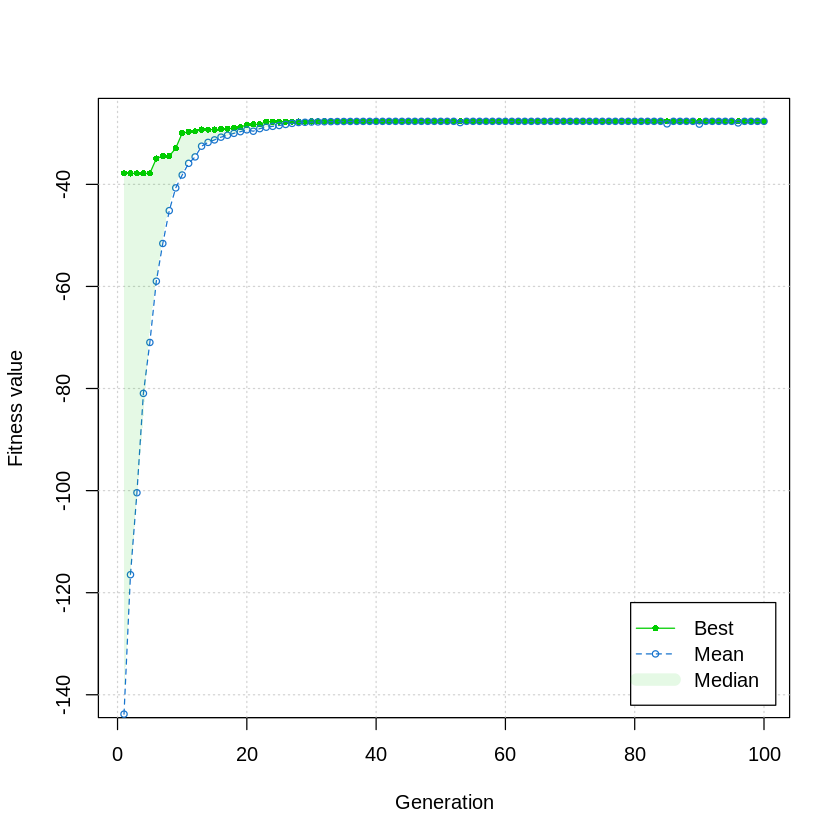

In [25]:
# function f7 combines f1 and f2 into one equation
# set the a value to be .5 and the b value to be .5
func7 <- function(x1, x2, x3, x4)
{
    (.5 * ((2 * x2 * x4) + (x3 * (x1 - (2 * x4))))) + (.5 *(60000 / ((x3 * (x1 - 2 * x4)^3) + 2 * x2 * x4 * (4 * x4^2 + 3 * x1 * (x1 - 2 * x4)))))
}

# Parameters constraints
x1 <- seq(10, 80, by = 0.5)
x2 <- seq(10, 50, by = 0.5)
x3 <- seq(0.9, 5.0, by = 0.1)
x4 <- seq(0.9, 5.0, by = 0.1)

# Multiple func7 by -1 to minimize the function
# set crossover and mutation value
GA7 <- ga(type = "real-valued",
         fitness =  function(x) -func7(x[1], x[2], x[3], x[4]),
         lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
         popSize = 50, maxiter = 100, run = 100, pcrossover = .75, pmutation = .001)

summary(GA7)
plot(GA7)

The minimization of this function results in the values obtained for x1, x2, x3 and x4 to be towards the lower bounds of their alloted values. The solution was found in 100 iterations of the genetic algorithm and results in a fitness value of -27.65256. The x values that produce this result are:

*   x1 = 15.43621
*   x2 = 13.44978
*   x3 = 1.426203
*   x4 = 1.279504

Each iteration, or generation, is graphed using its best, median, and mean fitness value. The best value is plotted using the solid green line with a solid green dot on each generation's best value. The average value is plotted using the dotted blue line with a hollow blue dot on each generation's mean value. The area in between these two lines are shaded with a light green, which shows the median values for each generation.


# Function 8
This function uses the same equation as function 3 to optimize the combination of f1 and f2 to find the best solution for the construction of the I-beam. Similar to before, x1, x2, x3, and x4 are used as constraints, but a and b are hard-coded values. This allows us to view how the behavior changes based on the different weights attributed to each function within f3.

The weighted function uses variables a and b that are decimal values that add up to 1. These weights represent the percentage of weights or importance placed on f1 and f2. The a variable corresponds to f1 and the b variable corresponds to f2. In this trial, a is set to .25, placing little or 25% of the value on f1, and b is set to .75, placing most or 75% of the value on f2.

The optimization of this problem will be achieved when the fitness value of f3 is minimized, which is achieved using a population size of 50, 100 generations, a crossover probability of 75%, and a mutation probability of 0.1%.


── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -17.39704 
Solution = 
           x1      x2       x3       x4
[1,] 14.84958 11.3888 1.446178 2.057351

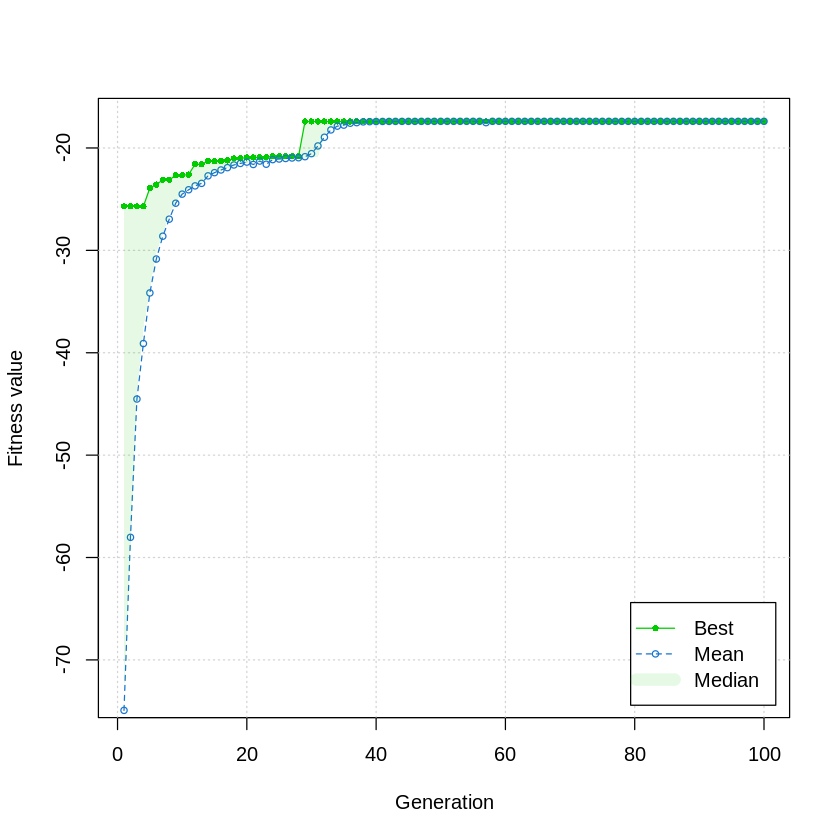

In [27]:
# function f8 combines f1 and f2 into one equation
# set the a value to be .25 and the b value to be .75
func8 <- function(x1, x2, x3, x4)
{
    (.25 * ((2 * x2 * x4) + (x3 * (x1 - (2 * x4))))) + (.75 *(60000 / ((x3 * (x1 - 2 * x4)^3) + 2 * x2 * x4 * (4 * x4^2 + 3 * x1 * (x1 - 2 * x4)))))
}

# Parameters constraints
x1 <- seq(10, 80, by = 0.5)
x2 <- seq(10, 50, by = 0.5)
x3 <- seq(0.9, 5.0, by = 0.1)
x4 <- seq(0.9, 5.0, by = 0.1)

# Multiple func8 by -1 to minimize the function
# set crossover and mutation value
GA8 <- ga(type = "real-valued",
         fitness =  function(x) -func8(x[1], x[2], x[3], x[4]),
         lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
         popSize = 50, maxiter = 100, run = 100, pcrossover = .75, pmutation = .001)

summary(GA8)
plot(GA8)

The minimization of this function results in the values obtained for x1, x2, x3 and x4 to be towards the lower bounds of their alloted values. The solution was found in 100 iterations of the genetic algorithm and results in a fitness value of -17.39704. The x values that produce this result are:

*   x1 = 14.84958
*   x2 = 11.3888
*   x3 = 1.446178
*   x4 = 2.057351

Each iteration, or generation, is graphed using its best, median, and mean fitness value. The best value is plotted using the solid green line with a solid green dot on each generation's best value. The average value is plotted using the dotted blue line with a hollow blue dot on each generation's mean value. The area in between these two lines are shaded with a light green, which shows the median values for each generation.


# Function 9
This function uses the same equation as function 3 to optimize the combination of f1 and f2 to find the best solution for the construction of the I-beam. Similar to before, x1, x2, x3, and x4 are used as constraints, but a and b are hard-coded values. This allows us to view how the behavior changes based on the different weights attributed to each function within f3.

The weighted function uses variables a and b that are decimal values that add up to 1. These weights represent the percentage of weights or importance placed on f1 and f2. The a variable corresponds to f1 and the b variable corresponds to f2. In this trial, a is set to .37, placing 37% of the value on f1, and b is set to .63, placing 63% of the value on f2.

The optimization of this problem will be achieved when the fitness value of f3 is minimized, which is achieved using a population size of 50, 100 generations, a crossover probability of 75%, and a mutation probability of 0.1%.


── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -30.5383 
Solution = 
           x1       x2       x3       x4
[1,] 16.47481 15.49403 1.694148 1.888989

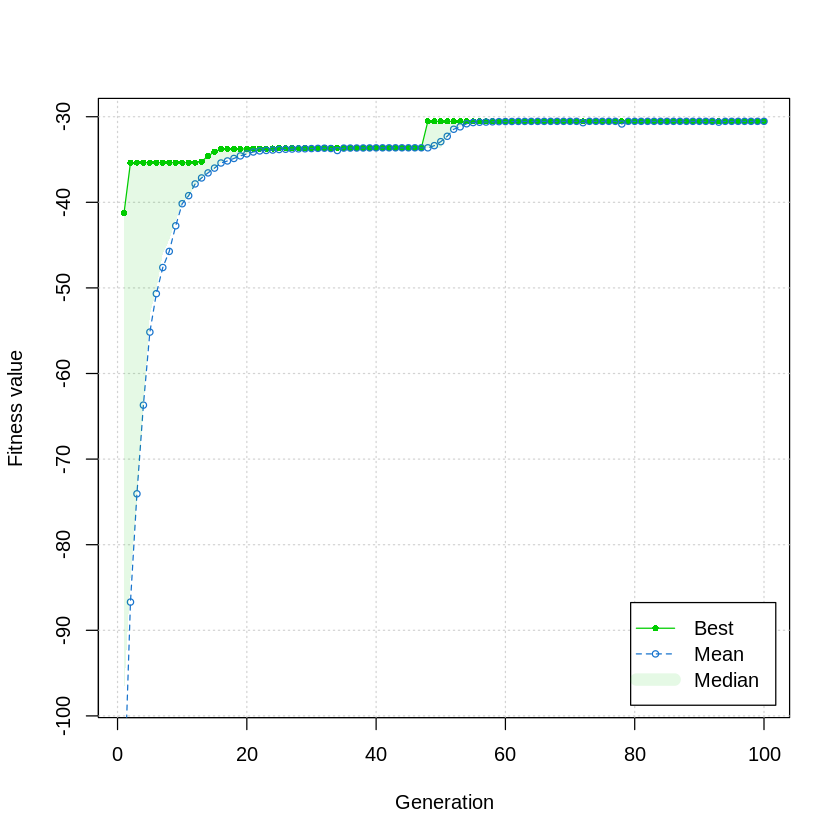

In [28]:
# function f9 combines f1 and f2 into one equation
# set the a value to be .37 and the b value to be .63
func9 <- function(x1, x2, x3, x4)
{
    (.37 * ((2 * x2 * x4) + (x3 * (x1 - (2 * x4))))) + (.63 *(60000 / ((x3 * (x1 - 2 * x4)^3) + 2 * x2 * x4 * (4 * x4^2 + 3 * x1 * (x1 - 2 * x4)))))
}

# Parameters constraints
x1 <- seq(10, 80, by = 0.5)
x2 <- seq(10, 50, by = 0.5)
x3 <- seq(0.9, 5.0, by = 0.1)
x4 <- seq(0.9, 5.0, by = 0.1)

# Multiple func9 by -1 to minimize the function
# set crossover and mutation value
GA9 <- ga(type = "real-valued",
         fitness =  function(x) -func9(x[1], x[2], x[3], x[4]),
         lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
         popSize = 50, maxiter = 100, run = 100, pcrossover = .75, pmutation = .001)

summary(GA9)
plot(GA9)

The minimization of this function results in the values obtained for x1, x2, x3 and x4 to be towards the lower bounds of their alloted values. The solution was found in 100 iterations of the genetic algorithm and results in a fitness value of -30.5383. The x values that produce this result are:

*   x1 = 16.47481
*   x2 = 15.49403
*   x3 = 1.694148
*   x4 = 1.888989

Each iteration, or generation, is graphed using its best, median, and mean fitness value. The best value is plotted using the solid green line with a solid green dot on each generation's best value. The average value is plotted using the dotted blue line with a hollow blue dot on each generation's mean value. The area in between these two lines are shaded with a light green, which shows the median values for each generation.


# Function 10
This function uses the same equation as function 3 to optimize the combination of f1 and f2 to find the best solution for the construction of the I-beam. Similar to before, x1, x2, x3, and x4 are used as constraints, but a and b are hard-coded values. This allows us to view how the behavior changes based on the different weights attributed to each function within f3.

The weighted function uses variables a and b that are decimal values that add up to 1. These weights represent the percentage of weights or importance placed on f1 and f2. The a variable corresponds to f1 and the b variable corresponds to f2. In this trial, a is set to .84, placing most or 84% of the value on f1, and b is set to .16, placing little or 16% of the value on f2.

The optimization of this problem will be achieved when the fitness value of f3 is minimized, which is achieved using a population size of 50, 100 generations, a crossover probability of 75%, and a mutation probability of 0.1%.


── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -63.80755 
Solution = 
           x1       x2       x3       x4
[1,] 13.02557 20.03562 1.854889 1.412012

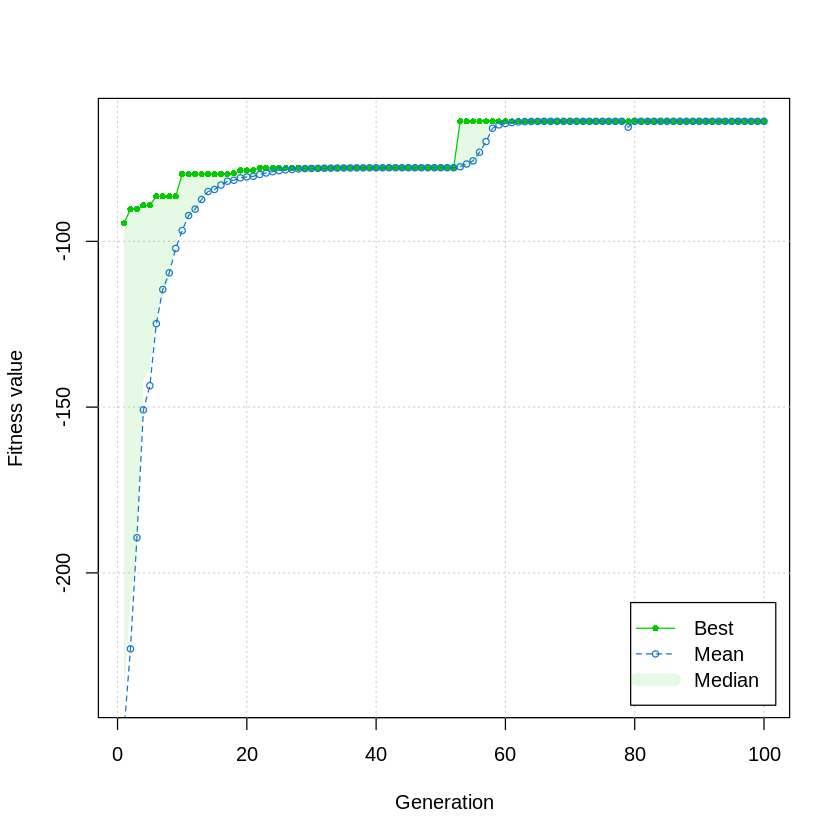

In [29]:
# function f10 combines f1 and f2 into one equation
# set the a value to be .84 and the b value to be .16
func10 <- function(x1, x2, x3, x4)
{
    (.84 * ((2 * x2 * x4) + (x3 * (x1 - (2 * x4))))) + (.16 *(60000 / ((x3 * (x1 - 2 * x4)^3) + 2 * x2 * x4 * (4 * x4^2 + 3 * x1 * (x1 - 2 * x4)))))
}

# Parameters constraints
x1 <- seq(10, 80, by = 0.5)
x2 <- seq(10, 50, by = 0.5)
x3 <- seq(0.9, 5.0, by = 0.1)
x4 <- seq(0.9, 5.0, by = 0.1)

# Multiple func10 by -1 to minimize the function
# set crossover and mutation value
GA10 <- ga(type = "real-valued",
         fitness =  function(x) -func10(x[1], x[2], x[3], x[4]),
         lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
         popSize = 50, maxiter = 100, run = 100, pcrossover = .75, pmutation = .001)

summary(GA10)
plot(GA10)

The minimization of this function results in the values obtained for x1, x2, x3 and x4 to be towards the lower bounds of their alloted values. The solution was found in 100 iterations of the genetic algorithm and results in a fitness value of -63.80755. The x values that produce this result are:

*   x1 = 13.02557
*   x2 = 20.03562
*   x3 = 1.854889
*   x4 = 1.412012

Each iteration, or generation, is graphed using its best, median, and mean fitness value. The best value is plotted using the solid green line with a solid green dot on each generation's best value. The average value is plotted using the dotted blue line with a hollow blue dot on each generation's mean value. The area in between these two lines are shaded with a light green, which shows the median values for each generation.